In [1]:
#imports
import chess.pgn
import numpy as np
import pandas as pd
import missingno as mso

Create a dataframe based on a pgn file

In [ ]:
def parse_pgn(pgn_file):
    from evals.evals_calc import evaluate_performance # Import the evaluate_performance function
    
    # Open and read the PGN file
    with open(pgn_file, 'r') as f:
        
        games = []
        for game in iter(lambda: chess.pgn.read_game(f), None):
            
            board = game.board() # Create a board for this game to convert the moves from UCI format to normal notation

            # Extract metadata
            event = game.headers.get("Event", "")
            site = game.headers.get("Site", "")
            white_player = game.headers.get("White", "")
            black_player = game.headers.get("Black", "")
            result = game.headers.get("Result", "")
            utc_date = game.headers.get("UTCDate", "")
            utc_time = game.headers.get("UTCTime", "")
            white_elo = game.headers.get("WhiteElo", "")
            black_elo = game.headers.get("BlackElo", "")
            white_rating_diff = game.headers.get("WhiteRatingDiff", "")
            black_rating_diff = game.headers.get("BlackRatingDiff", "")
            eco = game.headers.get("ECO", "")
            opening = game.headers.get("Opening", "")
            time_control = game.headers.get("TimeControl", "")
            termination = game.headers.get("Termination", "")
            
            # Get moves, it gets them in UCI format we need to convert them to standard notation
            moves = []
            
            for move in game.mainline_moves(): 
                moves.append(board.san(move))
                board.push(move)
                            
            # Evaluate the performance of both players
            white_perf, black_perf = evaluate_performance(game)

            # Create a dictionary forr game data
            game_data = {
                "Event": event,
                "Site": site,
                "White": white_player,
                "Black": black_player,
                "Result": result,
                "UTCDate": utc_date,
                "UTCTime": utc_time,
                "WhiteElo": white_elo,
                "BlackElo": black_elo,
                "WhiteRatingDiff": white_rating_diff,
                "BlackRatingDiff": black_rating_diff,
                "ECO": eco,
                "Opening": opening,
                "TimeControl": time_control,
                "Termination": termination,
                "Moves": moves,
                "White_Performance": round(white_perf),
                "Black_Performance": round(black_perf)
            }

            # Append game data to the games list
            games.append(game_data)

    # Create a DataFrame from the list of games
    df = pd.DataFrame(games)
    return df

# Parse the PGN file and create the DataFrame
df = parse_pgn("../data/raw/lichess_db_standard_rated_2013-01.pgn")

#Convert the resulting dataframe into a CSV file
df.to_csv("../data/raw/matches.csv")

In [25]:
df = pd.read_csv("../data/raw/matches.csv")

# Display the DataFrame
df

,Unnamed: 0,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,White_Performance,Black_Performance
0,0,Rated Classical game,https://lichess.org/j1dkb5dw,BFG9k,mamalak,1-0,2012.12.31,23:01:03,1639,1403,5.0,-8.0,C00,French Defense: Normal Variation,600+8,Normal,"['e2e4', 'e7e6', 'd2d4', 'b7b6', 'a2a3', 'c8b7...",44.871795,55.128205
1,1,Rated Classical game,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,1-0,2012.12.31,23:04:12,1654,1919,19.0,-22.0,D04,"Queen's Pawn Game: Colle System, Anti-Colle",480+2,Normal,"['d2d4', 'd7d5', 'g1f3', 'g8f6', 'e2e3', 'c8f5...",44.871795,55.128205
2,2,Rated Classical game,https://lichess.org/szom2tog,Kozakmamay007,VanillaShamanilla,1-0,2012.12.31,23:03:15,1643,1747,13.0,-94.0,C50,Four Knights Game: Italian Variation,420+17,Normal,"['e2e4', 'e7e5', 'g1f3', 'b8c6', 'f1c4', 'g8f6...",44.871795,55.128205
3,3,Rated Bullet game,https://lichess.org/rklpc7mk,Naitero_Nagasaki,800,0-1,2012.12.31,23:04:57,1824,1973,-6.0,8.0,B12,Caro-Kann Defense: Goldman Variation,60+1,Normal,"['e2e4', 'c7c6', 'b1c3', 'd7d5', 'd1f3', 'd5e4...",44.871795,55.128205
4,4,Rated Bullet game,https://lichess.org/1xb3os63,nichiren1967,Naitero_Nagasaki,0-1,2012.12.31,23:02:37,1765,1815,-9.0,9.0,C00,French Defense: La Bourdonnais Variation,60+1,Normal,"['e2e4', 'e7e6', 'f2f4', 'd7d5', 'e4e5', 'c7c5...",44.871795,55.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121327,121327,Rated Classical game,https://lichess.org/4w6vfr19,Yudhisthira,netsah08,0-1,2013.01.31,22:59:08,1854,1937,-9.0,16.0,E80,King's Indian Defense: Saemisch Variation,600+10,Normal,"['d2d4', 'g8f6', 'c2c4', 'g7g6', 'b1c3', 'f8g7...",44.871795,55.128205
121328,121328,Rated Classical game,https://lichess.org/33p7nthu,Daler,kualalumpur,0-1,2013.01.31,22:59:13,1500,1266,-331.0,12.0,B01,Scandinavian Defense,720+0,Time forfeit,"['e2e4', 'd7d5', 'd2d3', 'd5e4', 'd3e4', 'd8d1...",44.871795,55.128205
121329,121329,Rated Classical game,https://lichess.org/pzncnhrt,senip,Richard_XII,0-1,2013.01.31,22:59:27,1431,1523,-70.0,7.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,960+6,Normal,"['e2e4', 'd7d5', 'e4d5', 'd8d5', 'b1c3', 'd5d8...",44.871795,55.128205
121330,121330,Rated Blitz game,https://lichess.org/hhwb2whr,van9,shueardm,1-0,2013.01.31,22:59:41,1693,1479,6.0,-5.0,B00,Barnes Defense,180+1,Normal,"['e2e4', 'f7f6', 'f1c4', 'e7e6', 'd2d4', 'd8e7...",44.871795,55.128205


Delete site column as all data comes from liches website

In [26]:
df = df.drop(columns=["Site"])

df.head()

,Unnamed: 0,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,White_Performance,Black_Performance
0,0,Rated Classical game,BFG9k,mamalak,1-0,2012.12.31,23:01:03,1639,1403,5.0,-8.0,C00,French Defense: Normal Variation,600+8,Normal,"['e2e4', 'e7e6', 'd2d4', 'b7b6', 'a2a3', 'c8b7...",44.871795,55.128205
1,1,Rated Classical game,Desmond_Wilson,savinka59,1-0,2012.12.31,23:04:12,1654,1919,19.0,-22.0,D04,"Queen's Pawn Game: Colle System, Anti-Colle",480+2,Normal,"['d2d4', 'd7d5', 'g1f3', 'g8f6', 'e2e3', 'c8f5...",44.871795,55.128205
2,2,Rated Classical game,Kozakmamay007,VanillaShamanilla,1-0,2012.12.31,23:03:15,1643,1747,13.0,-94.0,C50,Four Knights Game: Italian Variation,420+17,Normal,"['e2e4', 'e7e5', 'g1f3', 'b8c6', 'f1c4', 'g8f6...",44.871795,55.128205
3,3,Rated Bullet game,Naitero_Nagasaki,800,0-1,2012.12.31,23:04:57,1824,1973,-6.0,8.0,B12,Caro-Kann Defense: Goldman Variation,60+1,Normal,"['e2e4', 'c7c6', 'b1c3', 'd7d5', 'd1f3', 'd5e4...",44.871795,55.128205
4,4,Rated Bullet game,nichiren1967,Naitero_Nagasaki,0-1,2012.12.31,23:02:37,1765,1815,-9.0,9.0,C00,French Defense: La Bourdonnais Variation,60+1,Normal,"['e2e4', 'e7e6', 'f2f4', 'd7d5', 'e4e5', 'c7c5...",44.871795,55.128205


Delete event column as we have the times of each match. Delete also players name and date and time columns.

In [27]:
df = df.drop(columns=["Event", "White", "Black", "UTCDate", "UTCTime"])

df.head()

,Unnamed: 0,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,White_Performance,Black_Performance
0,0,1-0,1639,1403,5.0,-8.0,C00,French Defense: Normal Variation,600+8,Normal,"['e2e4', 'e7e6', 'd2d4', 'b7b6', 'a2a3', 'c8b7...",44.871795,55.128205
1,1,1-0,1654,1919,19.0,-22.0,D04,"Queen's Pawn Game: Colle System, Anti-Colle",480+2,Normal,"['d2d4', 'd7d5', 'g1f3', 'g8f6', 'e2e3', 'c8f5...",44.871795,55.128205
2,2,1-0,1643,1747,13.0,-94.0,C50,Four Knights Game: Italian Variation,420+17,Normal,"['e2e4', 'e7e5', 'g1f3', 'b8c6', 'f1c4', 'g8f6...",44.871795,55.128205
3,3,0-1,1824,1973,-6.0,8.0,B12,Caro-Kann Defense: Goldman Variation,60+1,Normal,"['e2e4', 'c7c6', 'b1c3', 'd7d5', 'd1f3', 'd5e4...",44.871795,55.128205
4,4,0-1,1765,1815,-9.0,9.0,C00,French Defense: La Bourdonnais Variation,60+1,Normal,"['e2e4', 'e7e6', 'f2f4', 'd7d5', 'e4e5', 'c7c5...",44.871795,55.128205


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121332 entries, 0 to 121331
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         121332 non-null  int64  
 1   Result             121332 non-null  object 
 2   WhiteElo           121254 non-null  object 
 3   BlackElo           121192 non-null  object 
 4   WhiteRatingDiff    121114 non-null  float64
 5   BlackRatingDiff    121114 non-null  float64
 6   ECO                121332 non-null  object 
 7   Opening            121332 non-null  object 
 8   TimeControl        121332 non-null  object 
 9   Termination        121332 non-null  object 
 10  Moves              121332 non-null  object 
 11  White_Performance  121332 non-null  float64
 12  Black_Performance  121332 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 12.0+ MB


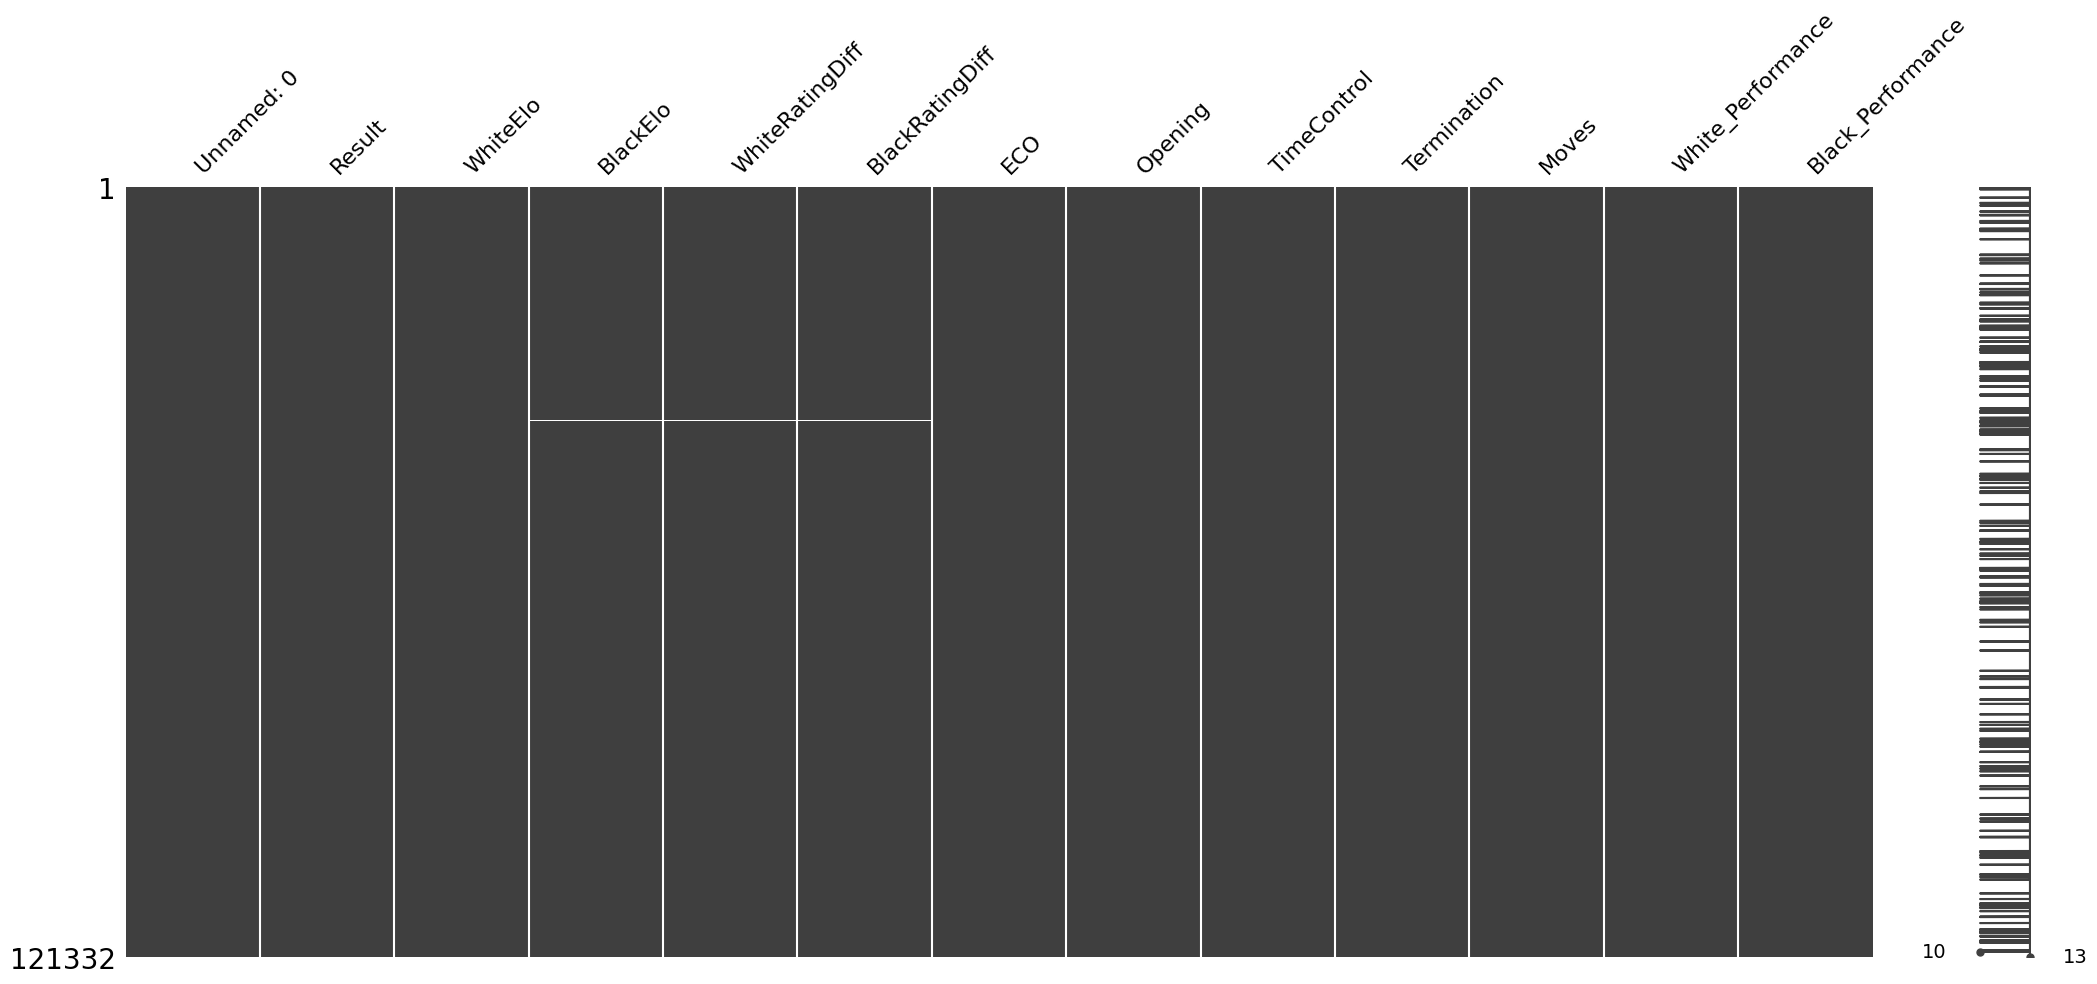

In [28]:
#Replace 'Unknown' and '?' with NaN to know which values are missing
df.replace(['Unknown', '?'], np.nan, inplace=True)

#Use missingno to visualize
mso.matrix(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121114 entries, 0 to 121331
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         121114 non-null  int64  
 1   Result             121114 non-null  object 
 2   WhiteElo           121114 non-null  object 
 3   BlackElo           121114 non-null  object 
 4   WhiteRatingDiff    121114 non-null  float64
 5   BlackRatingDiff    121114 non-null  float64
 6   ECO                121114 non-null  object 
 7   Opening            121114 non-null  object 
 8   TimeControl        121114 non-null  object 
 9   Termination        121114 non-null  object 
 10  Moves              121114 non-null  object 
 11  White_Performance  121114 non-null  float64
 12  Black_Performance  121114 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 12.9+ MB


<Axes: >

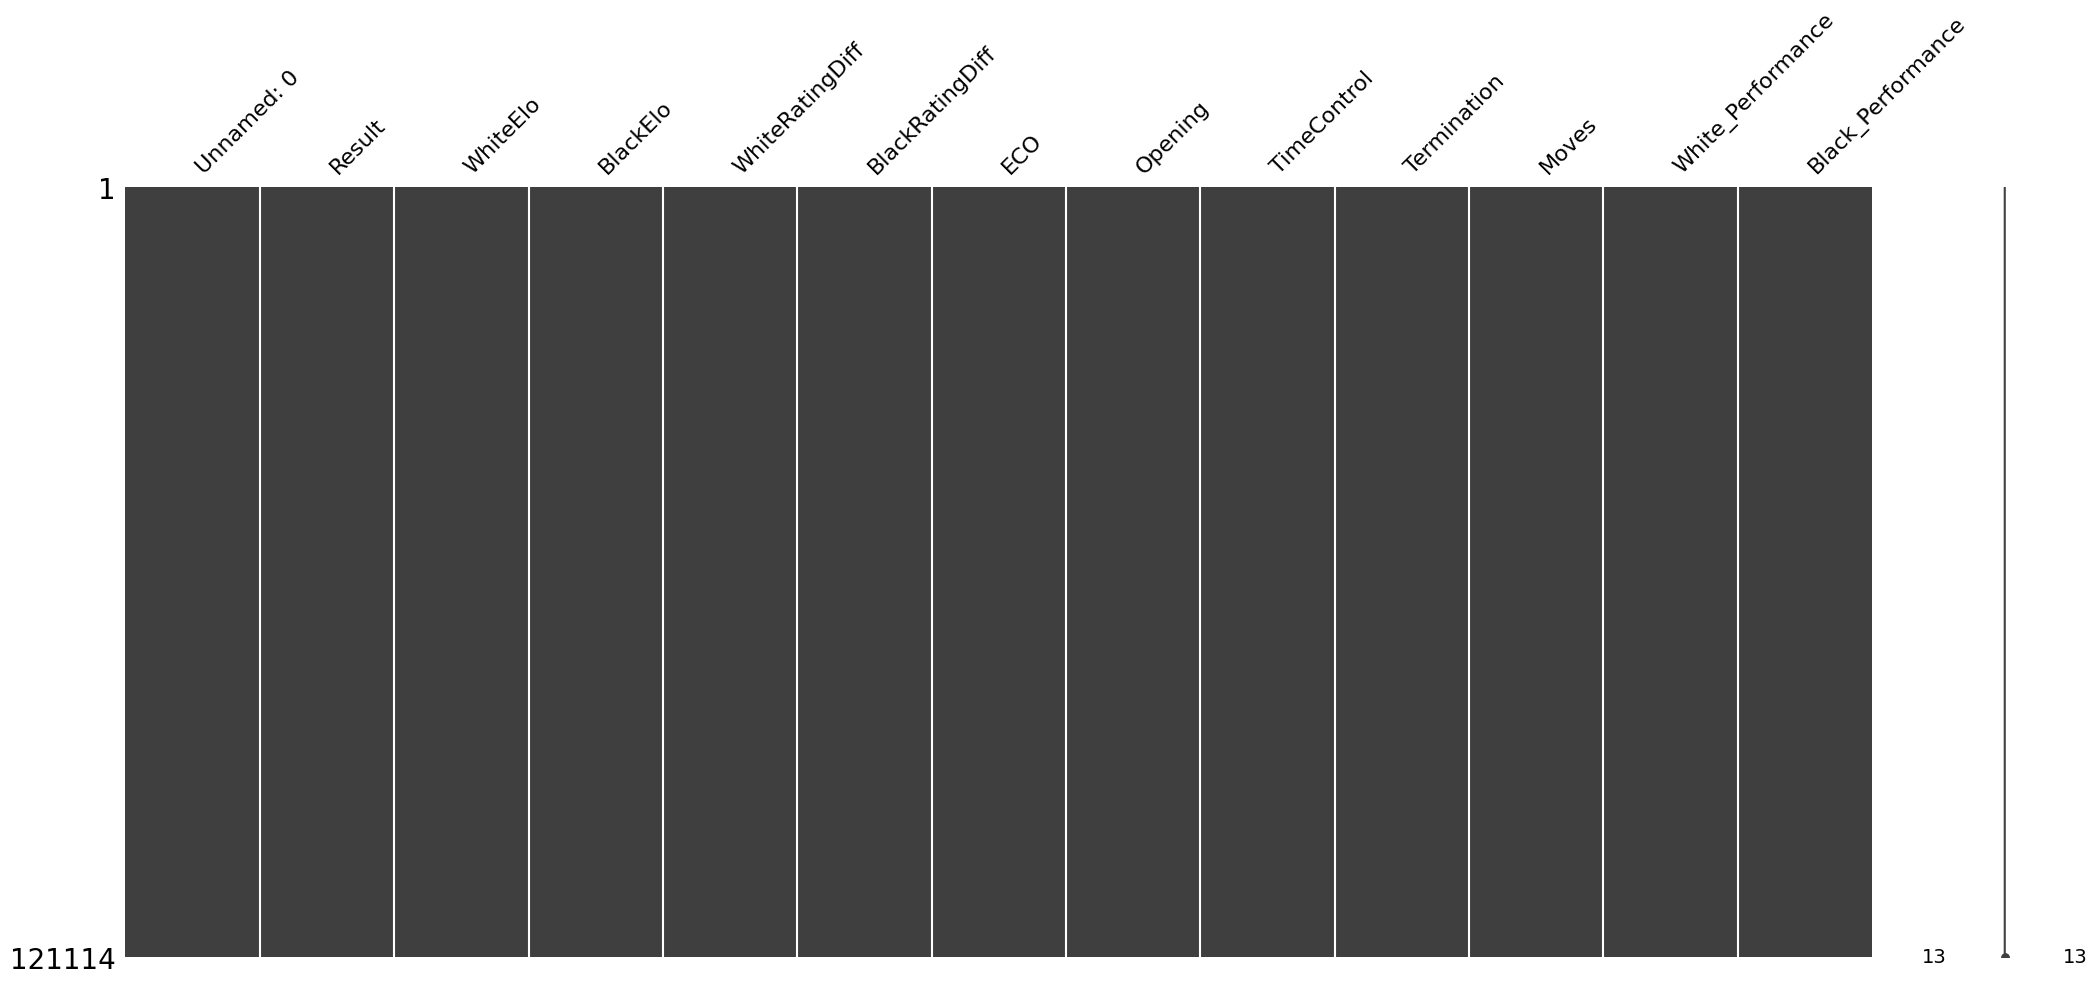

In [29]:
#Drop rows with NaN values
df_clean = df.dropna()

df_clean.info()
mso.matrix(df_clean)

In [30]:
duplicados = df[df.duplicated()]

duplicados

,Unnamed: 0,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,White_Performance,Black_Performance


In [31]:
df["Termination"].value_counts()

Termination
Normal          83449
Time forfeit    37883
Name: count, dtype: int64